In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [24]:
import seaborn as sns

In [54]:
from sklearn.model_selection import train_test_split

In [28]:
df=pd.read_csv("Assignment 2//problem_1//train.csv")

In [29]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [30]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
461,56,Male,17.7,8.8,239,43,185,5.6,2.4,0.70,1
462,51,Male,0.8,0.2,160,34,20,6.9,3.7,1.10,1
463,70,Female,0.9,0.3,220,53,95,6.1,2.8,0.68,1
464,32,Male,0.7,0.2,189,22,43,7.4,3.1,0.70,2
465,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1


In [31]:
#gender is a categorical variable so we will have to perform label encoding

In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [33]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,1,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,0,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,1,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,1,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [34]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,463.000000,466.000000
mean,45.321888,0.774678,3.406438,1.503004,294.877682,82.633047,114.982833,6.491845,3.149356,0.954104,1.285408
std,15.697936,0.418243,6.510448,2.823700,252.718859,192.801900,312.869109,1.096455,0.805285,0.333646,0.452094
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,46.000000,1.000000,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.100000,0.960000,1.000000
75%,58.000000,1.000000,2.575000,1.300000,298.000000,60.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,85.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### The count of "Albumin_and_globulin_Ratio" is less ,indicates null values

In [35]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    3
Dataset                       0
dtype: int64

### We need to remove or fill them, I choose to fill the median because of the small dataset 

In [36]:
df['Albumin_and_Globulin_Ratio'].fillna(value=df['Albumin_and_Globulin_Ratio'].median(), inplace=True)

In [37]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,45.321888,0.774678,3.406438,1.503004,294.877682,82.633047,114.982833,6.491845,3.149356,0.954142,1.285408
std,15.697936,0.418243,6.510448,2.823700,252.718859,192.801900,312.869109,1.096455,0.805285,0.332568,0.452094
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,46.000000,1.000000,1.000000,0.300000,210.000000,36.000000,42.000000,6.600000,3.100000,0.960000,1.000000
75%,58.000000,1.000000,2.575000,1.300000,298.000000,60.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,85.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## Feature Selection and Engineering

# These features are actually tests carried for detection of liver disease.

### From Total_BiliRubin , Direct_bilirubin can be subtracted to get Indirect_bilirubin.

In [40]:
indirect=df['Total_Bilirubin']-df['Direct_Bilirubin']
df.insert(4,'Indirect_Bilirubin',indirect)

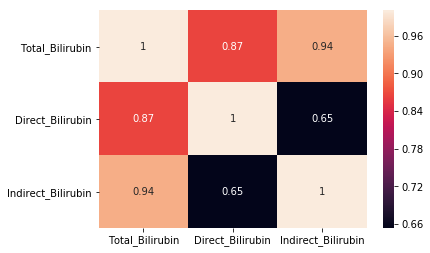

In [41]:
corr = df[['Total_Bilirubin','Direct_Bilirubin','Indirect_Bilirubin']].corr()
sns.heatmap(corr,annot=True)

## Range 0.9-1 indicates high positive correlation so any one of Indirect or Total could be used.

In [20]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Indirect_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,1,6.3,3.2,3.1,314,118,114,6.6,3.7,1.27,1
1,31,0,0.8,0.2,0.6,158,21,16,6.0,3.0,1.00,1
2,60,1,19.6,9.5,10.1,466,46,52,6.1,2.0,0.40,1
3,34,1,8.7,4.0,4.7,298,58,138,5.8,2.4,0.70,1
4,26,0,0.9,0.2,0.7,154,16,12,7.0,3.5,1.00,1


### Intuitively, Globulin amount can be extracted from the Ratio column and Albumin column

In [100]:
ag=df['Albumin_and_Globulin_Ratio']
a=df['Albumin']
g=ag/a

df.insert(9,'Globulin',g)

In [101]:
df.groupby('Dataset').mean()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Indirect_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Globulin,Albumin,Albumin_and_Globulin_Ratio
Dataset,,,,,,,,,,,,
1,46.675676,0.786787,4.298198,1.937237,2.360961,324.741742,101.735736,144.219219,6.457958,0.302634,3.056757,0.918138
2,41.932331,0.744361,1.173684,0.415789,0.757895,220.105263,34.804511,41.781955,6.576692,0.311739,3.381203,1.044286


## From the above data ,I inferred that if for both the classes mean is so close, the features wont be the important ones 

In [42]:
# let us see the full correlation map

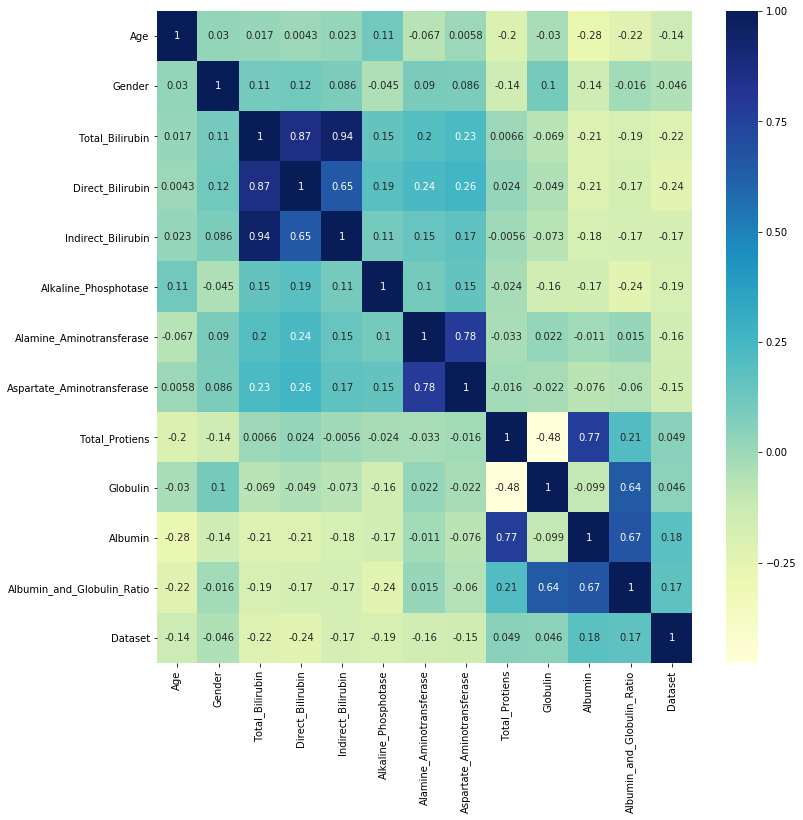

In [102]:
plt.figure(figsize=(12,12))

corr = df.corr()
sns.heatmap(corr,annot=True,cmap="YlGnBu")

## High correlation except Bilirubin can be seen in 
### 1)Total proteins and Albumin
### 2)Alamine and Aspartate
### 3)Albumin and Albumin _Globulin_Ratio

## Selecting the features accordingly

In [103]:
x=df.drop(['Dataset','Total_Bilirubin','Albumin_and_Globulin_Ratio','Total_Protiens'],axis=1)

In [104]:
x.shape

(466, 9)

In [105]:
x.columns ##These are the final features taken

Index(['Age', 'Gender', 'Direct_Bilirubin', 'Indirect_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Globulin', 'Albumin'],
      dtype='object')

In [53]:
y=df['Dataset']

In [158]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,test_size=0.1)

## Logistic Regression

In [159]:
from sklearn.linear_model import LogisticRegression

log=LogisticRegression(C=0.0001,max_iter=100000,solver='saga',warm_start=True,penalty='l2',random_state=1)

In [160]:
log.fit(x_train,y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100000,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=1,
          solver='saga', tol=0.0001, verbose=0, warm_start=True)

In [161]:
log.score(x_test,y_test)

0.8085106382978723

## Comparing performance of all available sklearn Classifiers on the accuracy score

In [56]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [57]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]


In [162]:
for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

KNeighborsClassifier
****Results****
Accuracy: 76.5957%
SVC
****Results****
Accuracy: 80.8511%
NuSVC
****Results****
Accuracy: 82.9787%
DecisionTreeClassifier
****Results****
Accuracy: 65.9574%
RandomForestClassifier
****Results****
Accuracy: 70.2128%
AdaBoostClassifier
****Results****
Accuracy: 76.5957%
GradientBoostingClassifier
****Results****
Accuracy: 72.3404%
GaussianNB
****Results****
Accuracy: 53.1915%
LinearDiscriminantAnalysis
****Results****
Accuracy: 80.8511%
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 57.4468%


## The best accuracy among all can be seen in NuSVC that is 82.9787%

In [78]:
#let us predict using that classifier

In [79]:
clf=NuSVC(probability=True)

In [80]:
clf.fit(x,y)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
   max_iter=-1, nu=0.5, probability=True, random_state=None,
   shrinking=True, tol=0.001, verbose=False)

In [81]:
test=pd.read_csv("Assignment 2//problem_1//test.csv")

In [82]:
test.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,Male,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,Male,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,Female,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,Male,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,Male,2.6,1.2,171,42,37,5.4,2.7,1.00


## We will have to do the conversions again, whatever we carried out on training data

In [84]:
le = preprocessing.LabelEncoder()
test['Gender']=le.fit_transform(test['Gender'])

In [173]:
test.shape

(117, 12)

In [85]:
test.head() #Male has been mapped to 1 and female to 0

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,46,1,0.8,0.2,160,31,40,7.3,3.8,1.10
1,15,1,0.8,0.2,380,25,66,6.1,3.7,1.50
2,66,0,4.2,2.1,159,15,30,7.1,2.2,0.40
3,32,1,0.6,0.1,237,45,31,7.5,4.3,1.34
4,60,1,2.6,1.2,171,42,37,5.4,2.7,1.00


In [86]:
test.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,116.000000
mean,42.452991,0.683761,2.870085,1.418803,273.444444,73.068376,89.709402,6.448718,3.111966,0.918966
std,17.905641,0.467008,4.828512,2.758027,199.308003,135.061016,160.939915,1.044329,0.757965,0.255245
min,4.000000,0.000000,0.500000,0.100000,90.000000,10.000000,13.000000,4.000000,1.400000,0.400000
25%,30.000000,0.000000,0.700000,0.200000,174.000000,24.000000,25.000000,5.600000,2.600000,0.730000
50%,42.000000,1.000000,0.900000,0.300000,206.000000,33.000000,41.000000,6.700000,3.100000,0.900000
75%,55.000000,1.000000,2.600000,1.200000,289.000000,62.000000,80.000000,7.100000,3.700000,1.030000
max,90.000000,1.000000,30.800000,18.300000,1420.000000,875.000000,1050.000000,9.200000,4.600000,1.700000


In [87]:
test['Albumin_and_Globulin_Ratio'].fillna(value=test['Albumin_and_Globulin_Ratio'].median(), inplace=True)

In [88]:
test.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
dtype: int64

In [89]:
indirect=test['Total_Bilirubin']-test['Direct_Bilirubin']
test.insert(4,'Indirect_Bilirubin',indirect)

In [90]:
ag=test['Albumin_and_Globulin_Ratio']
a=test['Albumin']
g=ag/a

test.insert(9,'Globulin',g)

In [91]:
test.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Indirect_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Globulin,Albumin,Albumin_and_Globulin_Ratio
0,46,1,0.8,0.2,0.6,160,31,40,7.3,0.289474,3.8,1.10
1,15,1,0.8,0.2,0.6,380,25,66,6.1,0.405405,3.7,1.50
2,66,0,4.2,2.1,2.1,159,15,30,7.1,0.181818,2.2,0.40
3,32,1,0.6,0.1,0.5,237,45,31,7.5,0.311628,4.3,1.34
4,60,1,2.6,1.2,1.4,171,42,37,5.4,0.370370,2.7,1.00


In [165]:
x_test=test.drop(['Total_Bilirubin','Albumin_and_Globulin_Ratio','Total_Protiens'],axis=1)

In [166]:
x_test.shape

(117, 9)

In [167]:
x_test.columns

Index(['Age', 'Gender', 'Direct_Bilirubin', 'Indirect_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Globulin', 'Albumin'],
      dtype='object')

In [169]:
result=clf.predict(x_test)

In [175]:
test.insert(loc=12,column='Dataset',value=result)

In [176]:
test.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Indirect_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Globulin,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,46,1,0.8,0.2,0.6,160,31,40,7.3,0.289474,3.8,1.10,2
1,15,1,0.8,0.2,0.6,380,25,66,6.1,0.405405,3.7,1.50,2
2,66,0,4.2,2.1,2.1,159,15,30,7.1,0.181818,2.2,0.40,1
3,32,1,0.6,0.1,0.5,237,45,31,7.5,0.311628,4.3,1.34,2
4,60,1,2.6,1.2,1.4,171,42,37,5.4,0.370370,2.7,1.00,2
